-------------Columns------------
Unnamed: 0              int64
ID                     object
Date                   object
Age                   float64
Sex                    object
Race                   object
ResidenceState         object
COD                    object
Heroin                  int64
Cocaine                 int64
Fentanyl               object
Fentanyl_Analogue     float64
Oxycodone               int64
Oxymorphone             int64
Ethanol                 int64
Hydrocodone             int64
Benzodiazepine          int64
Methadone               int64
Amphet                  int64
Tramad                  int64
Morphine_NotHeroin     object
Hydromorphone           int64
Other                  object
OpiateNOS               int64
AnyOpioid              object
MannerofDeath          object
dtype: object
----------------------------------------


----------------------------------------
The original dataframe has 5105 rows and 26 columns.
------------------------------------

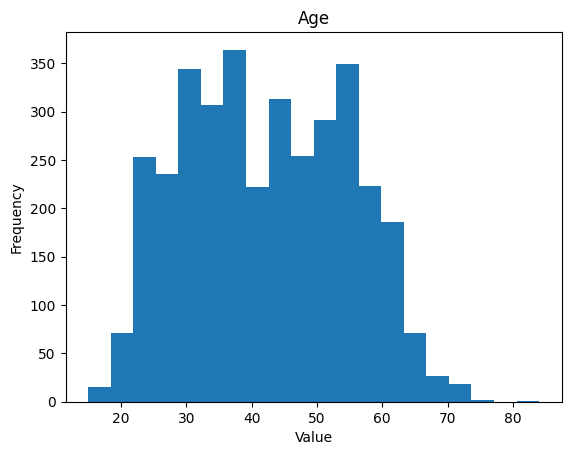

----------------------------------------
Mean of Age =  42.266497461928935
----------------------------------------


----------------------------------------
Mode of Age =  0    33.0
Name: Age, dtype: float64
----------------------------------------


----------------------------------------
Median of Age =  42.0
----------------------------------------




In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#load your data that you choose to work with into a pandas dataframe and do the following https://www.kaggle.com/datasets/ruchi798/drug-overdose-deaths
df = pd.read_csv('https://raw.githubusercontent.com/jduell75/PythonFDA2023/main/drug_deaths.csv')

#sort the dd by age
df=df.sort_values("Age",ascending=False)

#delete Colunms not used
del df['DateType']
del df['ResidenceCity']
del df['ResidenceCounty']
del df['DeathCity']
del df['DeathCounty']
del df['Location']
del df['LocationifOther']
del df['DescriptionofInjury']
del df['InjuryPlace']
del df['InjuryCity']
del df['InjuryCounty']
del df['InjuryState']
del df['OtherSignifican']
del df['DeathCityGeo']
del df['ResidenceCityGeo']
del df['InjuryCityGeo']

#make sure all columns are the appropriate data type
print("-------------Columns------------")
print(df.dtypes)
print("----------------------------------------")
print("\n")

#get the number of rows and columns in the original df
print("----------------------------------------")
print("The original dataframe has {} rows and {} columns.".format(*df.shape))
print("----------------------------------------")
print("\n")

#filter certian rows that have null or empty cells for certain used fields
df.dropna(subset=['Date','Age', 'Sex', 'Race', 'ResidenceState', 'COD', 'MannerofDeath', ], inplace=True)

#get the number of rows and columns in the filtered df
print("----------------------------------------")
print("The filtered dataframe has {} rows and {} columns.".format(*df.shape))
print("----------------------------------------")
print("\n")

#get column headings exclude objects
print("----------------------------------------")
print("Column headings")
colHeading = df.select_dtypes(exclude=['object'])
for item in colHeading:
    print(item)
print("----------------------------------------")
print("\n")

#create a histogram for age
for col in colHeading:
    if col == "Age":
        plt.hist(df[col], bins=20)
        plt.title(col)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()
        #Calculate the mean, median and mode for columns going to be used
        print("----------------------------------------")
        print("Mean of Age = ", df['Age'].mean())
        print("----------------------------------------")
        print("\n")

        print("----------------------------------------")
        print("Mode of Age = ", df['Age'].mode())
        print("----------------------------------------")
        print("\n")
        
        print("----------------------------------------")
        print("Median of Age = ", df['Age'].median())
        print("----------------------------------------")
        print("\n")

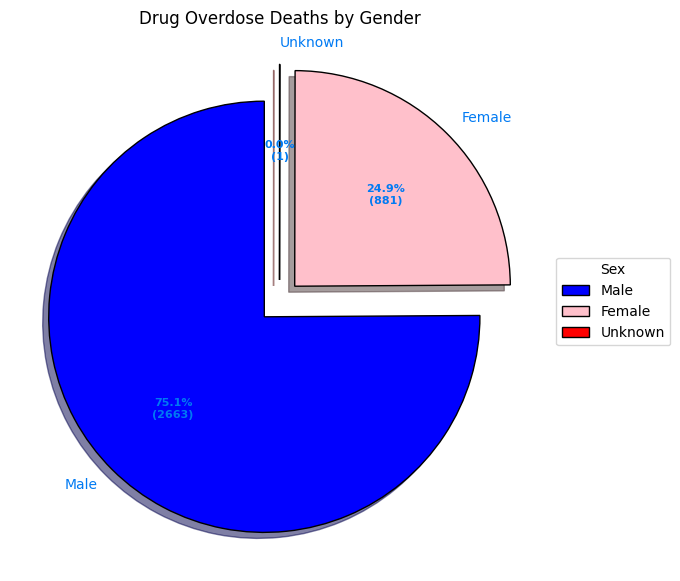

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ser = (df['Sex'].value_counts())

#explode data in pie
explode = (0.1, 0.1, 0.1)
 
#colors
colors = ( "blue", "pink", "red")

#wedgeprops parameters
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

#function to put % and value in pie
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

#create the plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(ser,
                                  autopct = lambda pct: func(pct, ser),
                                  explode = explode,
                                  labels = ser.index,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="#007AF3"))
ax.set_title("Drug Overdose Deaths by Gender")

#legend
ax.legend(wedges, ser.index,
          title ="Sex",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")

#show plot
plt.show()

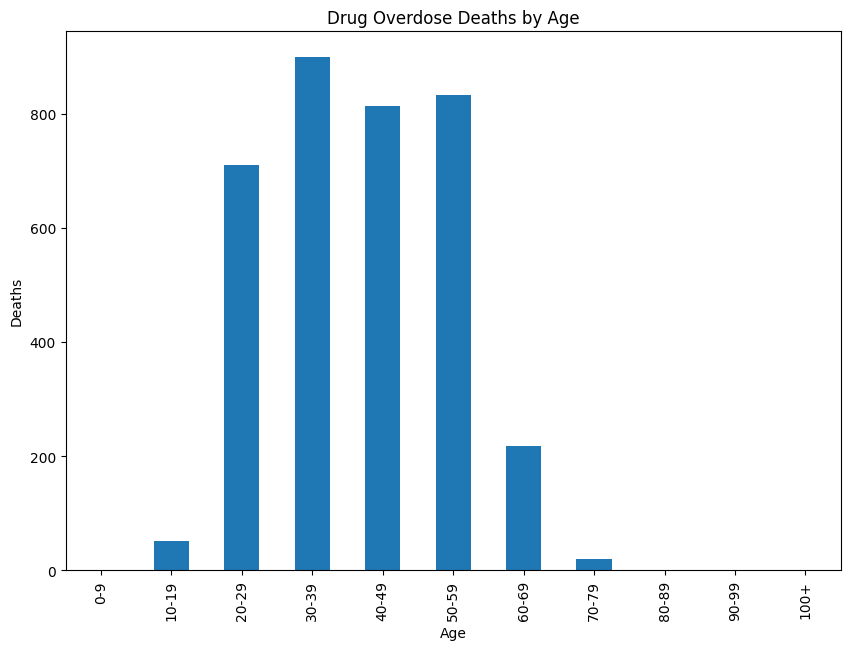

In [10]:
#Bar Chart - Drug Overdose Deaths by Age
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize =(10, 7))

#age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

#group by age and count number in each bucket
age_groups = df.groupby('Age Group')['Age'].count()

age_groups.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Deaths')
plt.title('Drug Overdose Deaths by Age')
plt.show()

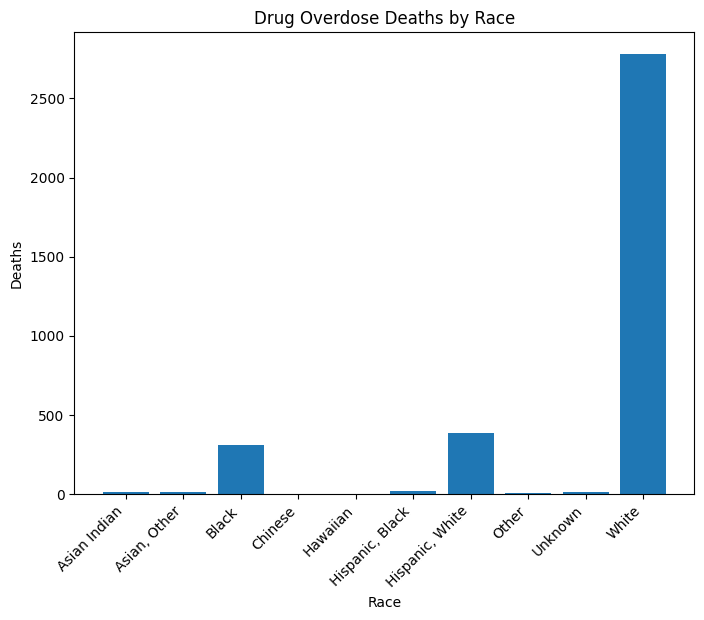

In [11]:
#Drug Overdose Deaths by Race
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#group by race
grouped_data = df.groupby(['Race']).size().reset_index(name='Count')

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=grouped_data['Race'], height=grouped_data['Count'])
ax.set_xlabel('Race')
ax.set_ylabel('Deaths')
ax.set_title('Drug Overdose Deaths by Race')
plt.xticks(rotation=45, ha='right')
plt.show()

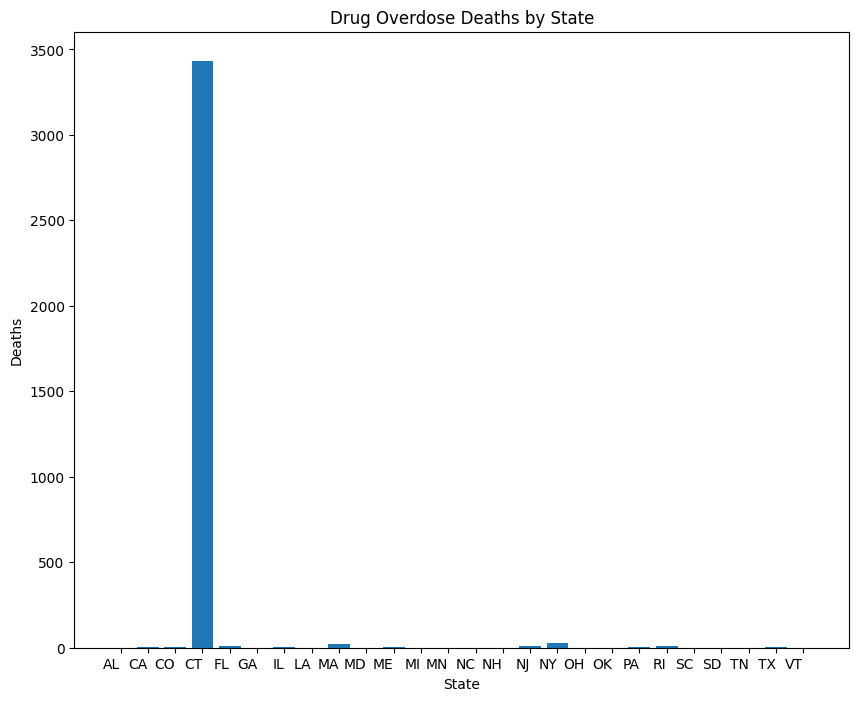

In [12]:
#Drug Overdose Deaths by State
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#group by State
grouped_data = df.groupby(['ResidenceState']).size().reset_index(name='Count')

fig, ax = plt.subplots(figsize=(10,8))
ax.bar(x=grouped_data['ResidenceState'], height=grouped_data['Count'])
ax.set_xlabel('State')
ax.set_ylabel('Deaths')
ax.set_title('Drug Overdose Deaths by State')
plt.xticks(rotation=0, ha='right')
plt.show()

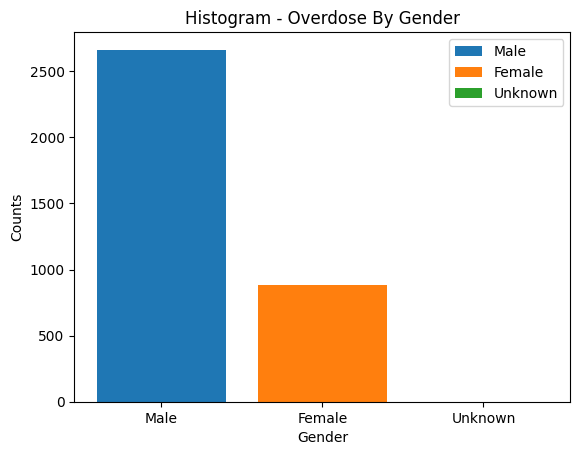

In [14]:
#Histogram - Overdose By Gender

#filter df by gender
male = df[df['Sex'] == 'Male']
female = df[df['Sex'] == 'Female']
unknown = df[df['Sex'] == 'Unknown']

#counts for males and females
male_count = male['Sex'].value_counts()
female_count = female['Sex'].value_counts()
unknown_count = unknown['Sex'].value_counts()

#Histogram plot
plt.bar(male_count.index, male_count.values, label='Male')
plt.bar(female_count.index, female_count.values, label='Female')
plt.bar(unknown_count.index, unknown_count.values, label='Unknown')

#labels
plt.xlabel('Gender')
plt.ylabel('Counts')

#title
plt.title('Histogram - Overdose By Gender')

#adding legend
plt.legend()

#plot
plt.show()

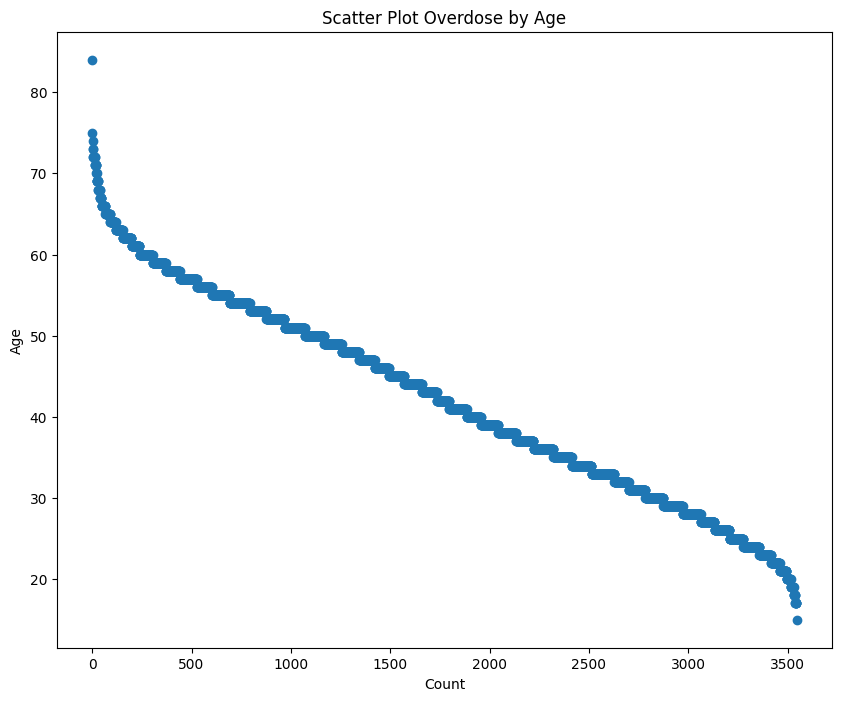

In [15]:
#Scatter Plot - Overdose by Age
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(10,8))

#filter df by Age
age = df['Age']

#create scatter plot
plt.scatter(range(len(age)), age)

#title
plt.title('Scatter Plot Overdose by Age')

#labels
plt.xlabel('Count')
plt.ylabel('Age')

#plot
plt.show()